<a href="https://colab.research.google.com/github/TofunmiSodimu/Novelty-Detection/blob/main/Model1_Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download csv training data from github
!wget https://github.com/TofunmiSodimu/Novelty-Detection/zipball/master.zip

--2024-04-02 19:41:59--  https://github.com/TofunmiSodimu/Novelty-Detection/zipball/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/TofunmiSodimu/Novelty-Detection/legacy.zip/main [following]
--2024-04-02 19:41:59--  https://codeload.github.com/TofunmiSodimu/Novelty-Detection/legacy.zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [     <=>            ]   4.41M  4.84MB/s    in 0.9s    

2024-04-02 19:42:00 (4.84 MB/s) - ‘master.zip’ saved [4627689]



In [ ]:
# Unzip folder
!unzip /content/master.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
# from sklearn import svm
# from sklearn.cluster import KMeans
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
time_arr = np.array([])
room_id = np.array([])
objname = 'instrument_guitar'
for i in range(51):
  number = str(i).zfill(3)
  file_name = "/content/TofunmiSodimu-Novelty-Detection-71e6b58/Training_Data_RoomsOnly/train"+number+".csv"
  data = pd.read_csv(file_name)
  names = data[['Obj_name']].values.astype(str)
  obj_idx = np.where(names == objname)[0]

  time = data[['Time']].values.astype(float)
  time_arr = np.append(time_arr,time[obj_idx])

  vals = data[['Room_name']].values.astype(str)
  vals = vals[obj_idx]
  # Convert room id to binary values (e.g.,'bathroom'=0,'bedroom'=1, 'home_office'=2, 'dining_room'=3)
  ids = preprocessing.LabelEncoder()
  ids.fit(['bathroom','dining_room','bedroom','home_office'])
  vals = ids.transform(vals.reshape(vals.shape[0]))
  room_id = np.append(room_id,vals)


In [ ]:
print(time_arr.shape)
print(objname)
print(room_id.shape)

(12648,)
instrument_guitar
(12648,)


In [ ]:
time_arr = time_arr.reshape(time_arr.shape[0],1)
room_id = room_id.reshape(room_id.shape[0],1)
train_input = np.concatenate((time_arr,room_id),axis=1)

In [ ]:
print(train_input.shape)

(12648, 2)


In [ ]:
# Cluster training data based on occurence of same (time,location)
cluster_dict = {}
for i in range(train_input.shape[0]):
  # print('here')
  if (str(train_input[i,0]),str(train_input[i,1])) not in cluster_dict:
    cluster_dict[(str(train_input[i,0]),str(train_input[i,1]))] = 1
  else:
    cluster_dict[(str(train_input[i,0]),str(train_input[i,1]))] += 1

In [ ]:
print(sum(cluster_dict.values()))
print(cluster_dict.values())
print(cluster_dict.keys())

12648
dict_values([51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 2, 3, 5, 7, 46, 45, 43, 45, 45, 46, 48, 47, 48, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 51, 51, 51, 51, 49, 48, 48, 46, 44, 42, 41, 44, 46, 48, 49, 3, 3, 3, 3, 49, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 5

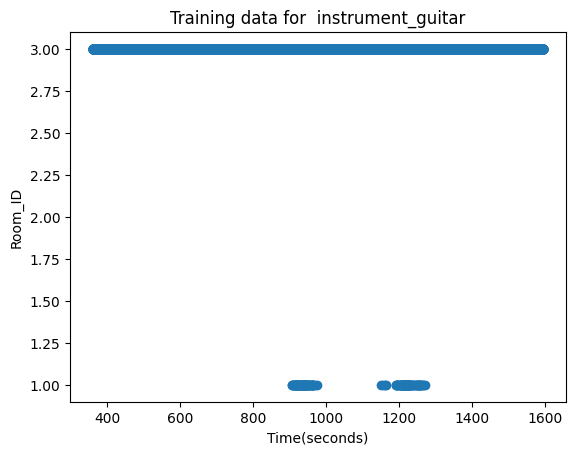

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.xlabel("Time(seconds)")
plt.ylabel("Room_ID")
title = "Training data for  " + objname
plt.title(title)
plt.show()

In [ ]:
time_arr_test = np.array([])
room_id_test = np.array([])
y_true = np.array([])

for i in range(0,24):
  number = str(i).zfill(3)
  file_name = "/content/TofunmiSodimu-Novelty-Detection-71e6b58/Corrupt_Testing_Data_RoomsOnly/test"+number+".csv"
  data = pd.read_csv(file_name)
  names = data[['Obj_name']].values.astype(str)
  obj_idx = np.where(names == objname)[0]

  time = data[['Time']].values.astype(float)
  time_arr_test = np.append(time_arr_test,time[obj_idx])

  vals = data[['Room_name']].values.astype(str)
  vals = vals[obj_idx]
  # Convert room id to binary values (e.g.,'bathroom'=0,'bedroom'=1, 'home_office'=2, 'dining_room'=3)
  vals = ids.transform(vals.reshape(vals.shape[0]))
  room_id_test = np.append(room_id_test,vals)

  # Get true y values
  # Normal - 1
  # Novel - -1

  file_name = "/content/TofunmiSodimu-Novelty-Detection-71e6b58/Corrupting_Details/corrupt_dets"+number+".csv"
  data = pd.read_csv(file_name)
  Indices = data[['Index']].values.astype(int)
  Room_Og = data[['Room_Og']].values.astype(float)
  Room_Changed = data[['Room_Changed']].values.astype(float)
  value = np.ones(names.shape[0])
  for j in range(len(Indices)):
    if (Room_Og[j] != Room_Changed[j]):
      value[Indices[j]] = -1
  y_true = np.append(y_true,value[obj_idx])

In [ ]:
print(time_arr_test.shape)
print(objname)
print(room_id_test.shape)
print(y_true.shape)

(5952,)
instrument_guitar
(5952,)
(5952,)


In [ ]:
time_arr_test = time_arr_test.reshape(time_arr_test.shape[0],1)
room_id_test = room_id_test.reshape(room_id_test.shape[0],1)
test_input = np.concatenate((time_arr_test,room_id_test),axis=1)

In [ ]:
print(test_input.shape)
print(test_input[0])

(5952, 2)
[360.   3.]


In [ ]:
# Normal - 1
# Novel - -1

min_pts = 5
counter = 0
y_output = np.ones(test_input.shape[0])*-1
for i in range(test_input.shape[0]):
  # If we have atleast min_pts identical points - not an anomaly
  if ((str(test_input[i][0]),str(test_input[i][1])) in cluster_dict) and (cluster_dict[(str(test_input[i][0]),str(test_input[i][1]))] >= min_pts):
    y_output[i] = 1
  # Else, calculate degree to which instance is an anomaly
  else:
    counter += 1
print(counter,'done')
print(y_output)
print(np.where(y_output == 1))

In [ ]:
min_pts = 5
vals = np.array(list(cluster_dict.values()))
outliers_ratio = len(np.where(vals < min_pts)[0])/train_input.shape[0]
if outliers_ratio > 0.5:
  outliers_ratio = 0.5

In [ ]:
#  Euclidean distance being used as distance metric may not be  appropriate because it uses distance between
# rooms which is arbitrary in this case
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=min_pts, novelty=True)
clf.fit(train_input)
y_pred = clf.predict(test_input)

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(y_pred.shape)

(5952,)


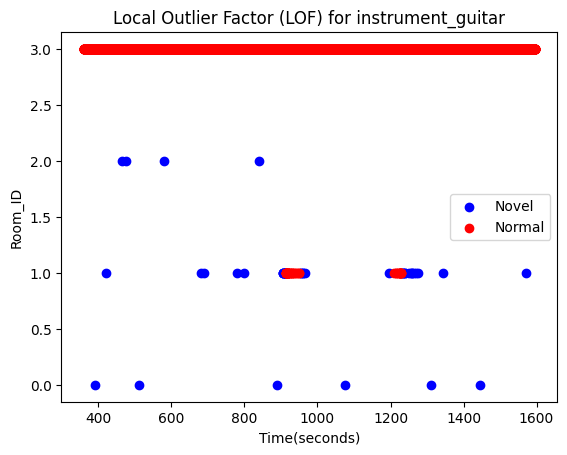

In [ ]:
novel = test_input[np.where(y_pred == -1)[0]]
normal = test_input[np.where(y_pred == 1)[0]]

# Plot novel instances
plt.scatter(novel[:,0],novel[:,1],color="b")
# Plot normal instances
plt.scatter(normal[:,0],normal[:,1],color="r")
plt.xlabel("Time(seconds)")
plt.ylabel("Room_ID")
plt.legend(["Novel","Normal"])
title = "Local Outlier Factor (LOF) for " + objname
plt.title(title)
plt.show()

In [ ]:
#  Test Accuracy at finding anomalies
# Normal - 1
# Novel - -1
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.9956317204301075


In [ ]:
normal_count = 0
for instance in normal:
  if (str(instance[0]),str(instance[1])) in cluster_dict:
    # print(cluster_dict[(str(instance[0]),str(instance[1]))])
    normal_count += 1
print('done',normal_count,len(normal))
print('done',normal_count,len(normal))
# novel_count = 0
# for instance in novel:
#   if (str(instance[0]),str(instance[1])) in cluster_dict:
#     print(cluster_dict[(str(instance[0]),str(instance[1]))])
#     novel_count += 1

65
65
33
33
29
29
29
29
29
39
14
9
9
9
9
9
9
9
11
13
3
3
3
3
3
3
4
2
2
2
4
3
2
8
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
65
65
33
33
29
29
29
29
29
39
10
5
6
2
2
6
2
2
2
2
2
2
3
1
1
4
1
1
1
1
1
1
1
1
2
1
1
3
1
5
1
1
1
1
1
1
2
2
1
1
65
65
33
33
29
29
29
29
29
39
10
5
6
2
2
6
2
2
2
2
2
2
3
2
2
2
2
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
1
65
65
33
33
29
29
29
29
29
39
14
9
9
9
9
9
9
9
11
13
2
8
2
2
6
2
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
65
65
33
33
4
4
4
11
4
5
2
2
4
2
4
2
2
2
2
5
4
1
1
4
1
1
1
1
1
1
6
3
3
3
5
3
4
2
2
2
5
1
3
1
1
1
1
3
3
3
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
65
65
33
33
29
29
29
29
29
39
6
5
5
5
5
5
5
5
13
8
1
3
5
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
65
65
33
33
29
29
29
29
29
39
21
17
10
10
10
10
10
10
11
13
5
5
5
5
5
5
5
6
6
5
7
7
7
7
7
7
7
13
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
65
65
25
25
25
25
25
25
14
10
5
6
2
2
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
1
1
1
65
65
7
7
17
7
9
7
11
3
3
3
3
3
5
2
1
4